In [ ]:
!pip3 install git+https://github.com/ultralytics/ultralytics.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-48eyfwye
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-48eyfwye
  Resolved https://github.com/ultralytics/ultralytics.git to commit a9129fb40e495ec292d952467325a4eae0f7b672
  Preparing metadata (setup.py) ... done


In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO("./result/train4/weights/best.pt")
model.export(format="onnx", imgsz=[640,640], opset=12)

Ultralytics YOLOv8.0.117 🚀 Python-3.9.7 torch-2.1.0.dev20230625 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

PyTorch: starting from result/train4/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

ONNX: starting export with onnx 1.14.0 opset 12...
ONNX: export success ✅ 0.6s, saved as result/train4/weights/best.onnx (11.7 MB)

Export complete (0.8s)
Results saved to /Users/ahadiihsanrasyidin/Projects/final-project/personal_anpr_flask/result/train4/weights
Predict:         yolo predict task=detect model=result/train4/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=result/train4/weights/best.onnx imgsz=640 data=datasets/data.yaml 
Visualize:       https://netron.app


========== Diagnostic Run torch.onnx.export version 2.1.0.dev20230625 ==========
verbose: False, log level: 40
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'result/train4/weights/best.onnx'

Inference ONNX

In [5]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.4 MB/s eta 0:00:00


In [6]:
import onnxruntime

The code you have provided sets up an onnxruntime.SessionOptions object with a few options. Let's go through them one by one:

- enable_mem_pattern: This option controls whether memory pattern optimization is enabled or not. When enabled, onnxruntime can analyze the memory usage pattern of a model and allocate memory more efficiently, which can reduce memory usage and improve performance. Setting this option to False disables memory pattern optimization.
- enable_cpu_mem_arena: This option controls whether CPU memory arena is enabled or not. Memory arena is a technique used by onnxruntime to manage memory more efficiently. When enabled, onnxruntime allocates memory in chunks and reuses them, which can improve performance. Setting this option to False disables CPU memory arena.
- graph_optimization_level: This option controls the level of optimization performed on the ONNX graph during inference. onnxruntime provides several levels of optimization, ranging from ORT_DISABLE_ALL (which disables all optimization) to ORT_ENABLE_EXTENDED (which enables all available optimization). In the code you provided, ORT_DISABLE_ALL is used, which disables all optimization.

In [7]:
opt_session = onnxruntime.SessionOptions()
opt_session.enable_mem_pattern = False
opt_session.enable_cpu_mem_arena = True
opt_session.graph_optimization_level = onnxruntime.GraphOptimizationLevel.ORT_DISABLE_ALL
# opt_session.genera


The code you provided sets up an onnxruntime.InferenceSession object, which is used to load an ONNX model and run inference on it. Let's go through the parameters used:

- model_path: This parameter specifies the path to the ONNX model file that you want to load. In the example you provided, the path is set to 'model_name.onnx'.
- providers: This parameter specifies the list of execution providers that should be used for inference. Execution providers are responsible for executing the operations in the ONNX model, and onnxruntime provides several built-in execution providers, including CPUExecutionProvider and CUDAExecutionProvider (which use CPU and GPU for inference, respectively). In the example you provided, a list of two execution providers is used: ['CUDAExecutionProvider', 'CPUExecutionProvider']. This means that onnxruntime will try to use the CUDAExecutionProvider first, and if it is not available (e.g., because there is no GPU), it will fall back to the CPUExecutionProvider.


In [26]:
model_path = 'result/train4/weights/best.onnx'
EP_list = ['CoreMLExecutionProvider']

ort_session = onnxruntime.InferenceSession(model_path, providers=EP_list)

The code you provided retrieves the input information for the loaded ONNX model using the get_inputs method of the onnxruntime.InferenceSession object. Let's go through the variables that are created:

- model_inputs: This variable is a list of input nodes for the loaded ONNX model. Each input node is represented as an onnxruntime.NodeArg object, which contains information about the name, shape, and data type of the input.

- input_names: This variable is a list of the names of the input nodes for the model. The names can be used to identify the inputs when running inference on the model.

- input_shape: This variable contains the shape of the first input node in the model. Since the ONNX model can have multiple inputs, the shape of each input may be different. In the example you provided, the shape of the first input node is retrieved by accessing model_inputs[0].shape.

By retrieving the input information for the model, you can prepare the input data that needs to be passed to the model when running inference. You can use the input names and shapes to create the input data in the correct format. Once you have prepared the input data, you can pass it to the run method of the onnxruntime.InferenceSession object to run inference on the model.

In [9]:
model_inputs = ort_session.get_inputs()
input_names = [model_inputs[i].name for i in range(len(model_inputs))]
input_shape = model_inputs[0].shape
input_shape

[1, 3, 640, 640]

The code you provided retrieves the output information for the loaded ONNX model using the get_outputs method of the onnxruntime.InferenceSession object. Let's go through the variables that are created:

- model_output: This variable is a list of output nodes for the loaded ONNX model. Each output node is represented as an onnxruntime.NodeArg object, which contains information about the name, shape, and data type of the output.

- output_names: This variable is a list of the names of the output nodes for the model. The names can be used to identify the outputs when running inference on the model.

By retrieving the output information for the model, you can access the output data produced by the model during inference. You can use the output names and shapes to retrieve the output data in the correct format. Once you have retrieved the output data, you can use it to perform further processing or analysis.

In [10]:
model_output = ort_session.get_outputs()
output_names = [model_output[i].name for i in range(len(model_output))]
# ouput_names[0].shap

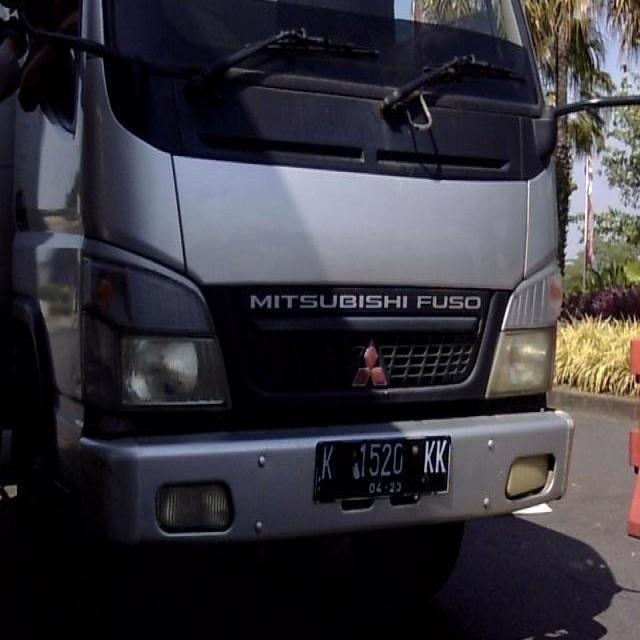

In [11]:
import cv2
import numpy as np
from PIL import Image

image = cv2.imread('datasets/validation/images/100_K1520KK.jpeg')
image_height, image_width = image.shape[:2]
Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Let's go through the code you provided:

- input_height and input_width: These variables contain the height and width of the input tensor required by the ONNX model. The height and width were obtained from the input_shape variable, which was retrieved from the ONNX model earlier.

- image_rgb: This variable contains the input image data in RGB color format. The original image data was read using OpenCV's imread function, which reads images in the BGR color format by default. The cvtColor function is used to convert the image data from BGR to RGB color format.

- resized: This variable contains the resized image data, which is resized to match the dimensions of the input tensor required by the ONNX model. The resize function is used to resize the image data.

- input_image: This variable contains the input tensor data after normalization and rearrangement of the image data. The pixel values of the resized image data are first scaled to the range of 0 to 1. Then, the dimensions of the image data are rearranged to match the input tensor format required by the ONNX model, which is (batch_size, channel, height, width).

- input_tensor: This variable contains the final input tensor data, which is a NumPy array with shape (batch_size, channel, height, width). The batch size is set to 1 since only a single image is being processed. The data type of the array is float32.

Once you have prepared the input tensor data, you can pass it to the run method of the onnxruntime.InferenceSession object to run inference on the model.

In [12]:
input_height, input_width = input_shape[2:]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized = cv2.resize(image_rgb, (input_width, input_height))

# Scale input pixel value to 0 to 1
input_image = resized / 255.0
input_image = input_image.transpose(2,0,1)
input_tensor = input_image[np.newaxis, :, :, :].astype(np.float32)
input_tensor.shape

(1, 3, 640, 640)

In [13]:
input_tensor

array([[[[   0.011765,           0,           0, ...,     0.16471,     0.18039,     0.22353],
         [   0.011765,           0,    0.027451, ...,     0.16078,     0.16471,     0.18824],
         [   0.047059,   0.0078431,    0.019608, ...,     0.16863,     0.13725,     0.15294],
         ...,
         [  0.0078431,   0.0078431,   0.0078431, ...,     0.47843,     0.47843,     0.47843],
         [  0.0078431,   0.0078431,   0.0078431, ...,     0.47843,     0.47451,     0.47451],
         [  0.0078431,   0.0078431,   0.0078431, ...,     0.47451,     0.47059,     0.47059]],

        [[   0.031373,   0.0039216,   0.0039216, ...,     0.10588,     0.12941,     0.17255],
         [   0.031373,    0.015686,    0.039216, ...,     0.10196,     0.10196,     0.13725],
         [   0.066667,    0.027451,    0.031373, ...,      0.1098,     0.07451,    0.090196],
         ...,
         [          0,           0,           0, ...,     0.43922,     0.43922,     0.43922],
         [          0,        

The code you provided runs inference on the ONNX model using the run method of the onnxruntime.InferenceSession object. Let's go through the variables that are created:

- outputs: This variable contains the output data produced by the ONNX model during inference. The run method returns a tuple of outputs for the model, with each output represented as a NumPy array. In this case, we are only interested in the first output, which is why we use [0] to access it.

To run inference on the model, we pass the input tensor data as a dictionary to the run method, where the keys are the names of the input nodes for the model (in this case, input_names[0]), and the values are the input tensor data. We also provide a list of output node names (output_names) so that the run method knows which outputs to return. Once the run method is called, it performs inference on the model and returns the output data in the form of NumPy arrays.

In [29]:
outputs = ort_session.run(output_names, {input_names[0]: input_tensor})[0]

In [30]:
outputs

array([[[     12.883,       16.78,      33.649, ...,      500.32,      566.38,      584.38],
        [     11.292,      10.092,      5.5863, ...,       583.9,      591.12,      591.38],
        [     25.511,      33.318,      66.198, ...,       277.4,      148.91,      113.34],
        [     21.222,      19.289,      10.723, ...,      115.49,      101.26,      129.33],
        [ 3.7551e-06,  3.3587e-05,  3.3468e-05, ...,  4.8578e-06,  6.8843e-06,  5.6028e-06]]], dtype=float32)

This variable contains the processed output data produced by the ONNX model during inference. The outputs variable returned by the run method is a NumPy array of shape (batch_size, num_classes, num_boxes, 4 + 1). In this case, since we are processing only a single image, the batch_size dimension is 1, so we can remove it using the squeeze function. The resulting array has shape (num_classes, num_boxes, 4 + 1), where num_classes is the number of object classes, num_boxes is the number of predicted bounding boxes, and 4 + 1 is the number of values predicted for each bounding box (4 for the coordinates of the bounding box and 1 for the confidence score).

We transpose the array to match the shape (4 + 1, num_boxes, num_classes) so that we can process the bounding box coordinates and confidence scores separately for each object class. The +1 in the shape is for the confidence score, which is also treated as a separate dimension during processing.

In [32]:
predictions = np.squeeze(outputs).T
predictions

array([[     12.883,      11.292,      25.511,      21.222,  3.7551e-06],
       [      16.78,      10.092,      33.318,      19.289,  3.3587e-05],
       [     33.649,      5.5863,      66.198,      10.723,  3.3468e-05],
       ...,
       [     500.32,       583.9,       277.4,      115.49,  4.8578e-06],
       [     566.38,      591.12,      148.91,      101.26,  6.8843e-06],
       [     584.38,      591.38,      113.34,      129.33,  5.6028e-06]], dtype=float32)

The code you provided is used to filter out predictions with object confidence scores below a certain threshold. Let's go through the variables that are created:

- conf_threshold: This variable specifies the threshold value for object confidence scores. Any predictions with object confidence scores below this threshold will be filtered out.

- scores: This variable contains the maximum object confidence score for each predicted bounding box. The object confidence score is the fifth element of the predicted values for each bounding box, i.e., predictions[:, 4:]. The max function is used to compute the maximum confidence score across all object classes for each predicted bounding box. The resulting scores array has shape (num_boxes,), where num_boxes is the number of predicted bounding boxes.

In [28]:
conf_thresold = 0.8
# Filter out object confidence scores below threshold
scores = np.max(predictions[:, 4:], axis=1)
predictions = predictions[scores > conf_thresold, :]
scores = scores[scores > conf_thresold]
scores

array([     0.8148], dtype=float32)

The code you provided is used to extract the class IDs (i.e., the object classes) for each predicted bounding box. Let's go through the variables that are created:

- class_ids: This variable contains the class IDs (i.e., the object classes) for each predicted bounding box. The class probabilities for each bounding box are given by the last num_classes elements of the predicted values for that bounding box, i.e., predictions[:, 4:]. The argmax function is used to find the index of the maximum probability (i.e., the predicted class) for each bounding box. The resulting class_ids array has shape (num_filtered_boxes,), where num_filtered_boxes is the number of filtered bounding boxes (i.e., those with confidence scores above the threshold). Each element of the class_ids array corresponds to the predicted object class for the corresponding bounding box

In [18]:
# Get the class with the highest confidence
class_ids = np.argmax(predictions[:, 4:], axis=1)
class_ids

array([0])

The code you provided is used to compute the bounding box coordinates for each predicted object, and rescale them back to the original image size. Let's go through the variables that are created:

- boxes: This variable contains the predicted bounding box coordinates for each object, in the format (x1, y1, x2, y2). The x1 and y1 coordinates are the top-left corner of the bounding box, and the x2 and y2 coordinates are the bottom-right corner of the bounding box. The boxes variable has shape (num_filtered_boxes, 4), where num_filtered_boxes is the number of filtered bounding boxes (i.e., those with confidence scores above the threshold). Each row of the boxes array corresponds to the predicted bounding box coordinates for the corresponding object.

- input_shape: This variable contains the shape of the input image, as (input_width, input_height, input_width, input_height). This is used to rescale the bounding box coordinates from the normalized input size (i.e., the size of the image that was passed to the model) back to the original image size.

- The first line of code simply gets the bounding box coordinates for each object from the predictions array. Since the bounding box coordinates are the first four elements of each row of the predictions array, we simply take the first four columns of the predictions array to get the boxes variable.

- The second line of code rescales the bounding box coordinates from the normalized input size to the original image size. This is done by dividing the boxes array by the input_shape array, element-wise, using numpy's divide function. We cast the resulting array to np.float32 to avoid integer division.

- The third line of code multiplies the rescaled boxes array by the original image size, again element-wise. This rescales the bounding box coordinates from the normalized input size to the original image size. We cast the resulting array to np.int32 to ensure that the bounding box coordinates are integers (since we can't have fractional pixel coordinates).

In [19]:
# Get bounding boxes for each object
boxes = predictions[:, :4]

#rescale box
input_shape = np.array([input_width, input_height, input_width, input_height])
boxes = np.divide(boxes, input_shape, dtype=np.float32)
boxes *= np.array([image_width, image_height, image_width, image_height])
boxes = boxes.astype(np.int32)
boxes

array([[383, 467, 142,  69]], dtype=int32)

In [20]:
def nms(boxes, scores, iou_threshold):
    # Sort by score
    sorted_indices = np.argsort(scores)[::-1]

    keep_boxes = []
    while sorted_indices.size > 0:
        # Pick the last box
        box_id = sorted_indices[0]
        keep_boxes.append(box_id)

        # Compute IoU of the picked box with the rest
        ious = compute_iou(boxes[box_id, :], boxes[sorted_indices[1:], :])

        # Remove boxes with IoU over the threshold
        keep_indices = np.where(ious < iou_threshold)[0]

        # print(keep_indices.shape, sorted_indices.shape)
        sorted_indices = sorted_indices[keep_indices + 1]

    return keep_boxes

def compute_iou(box, boxes):
    # Compute xmin, ymin, xmax, ymax for both boxes
    xmin = np.maximum(box[0], boxes[:, 0])
    ymin = np.maximum(box[1], boxes[:, 1])
    xmax = np.minimum(box[2], boxes[:, 2])
    ymax = np.minimum(box[3], boxes[:, 3])

    # Compute intersection area
    intersection_area = np.maximum(0, xmax - xmin) * np.maximum(0, ymax - ymin)

    # Compute union area
    box_area = (box[2] - box[0]) * (box[3] - box[1])
    boxes_area = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])
    union_area = box_area + boxes_area - intersection_area

    # Compute IoU
    iou = intersection_area / union_area

    return iou

The code you provided is used to perform non-maximum suppression (NMS) on the filtered bounding boxes. NMS is a technique used in object detection to suppress overlapping bounding boxes and retain only the ones with the highest confidence scores

In [21]:
# Apply non-maxima suppression to suppress weak, overlapping bounding boxes
indices = nms(boxes, scores, 0.3)
print(indices)

[0]


In [22]:
boxes[indices], scores[indices], class_ids[indices]

(array([[383, 467, 142,  69]], dtype=int32),
 array([     0.8148], dtype=float32),
 array([0]))

In [23]:
CLASSES = [
	'license_plate'
]

In [24]:
def xywh2xyxy(x):
    # Convert bounding box (x, y, w, h) to bounding box (x1, y1, x2, y2)
    y = np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2
    y[..., 1] = x[..., 1] - x[..., 3] / 2
    y[..., 2] = x[..., 0] + x[..., 2] / 2
    y[..., 3] = x[..., 1] + x[..., 3] / 2
    return y

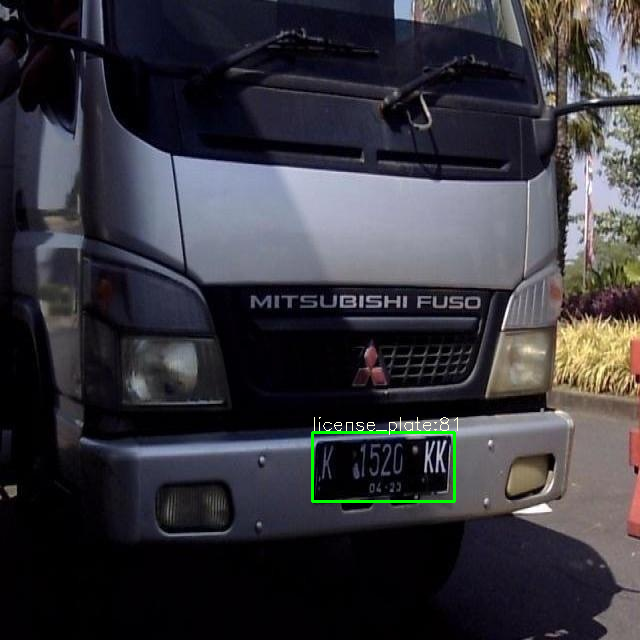

In [25]:
image_draw = image.copy()
for (bbox, score, label) in zip(xywh2xyxy(boxes[indices]), scores[indices], class_ids[indices]):
    bbox = bbox.round().astype(np.int32).tolist()
    cls_id = int(label)
    cls = CLASSES[cls_id]
    color = (0,255,0)
    cv2.rectangle(image_draw, tuple(bbox[:2]), tuple(bbox[2:]), color, 2)
    cv2.putText(image_draw,
                f'{cls}:{int(score*100)}', (bbox[0], bbox[1] - 2),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.60, [225, 255, 255],
                thickness=1)
Image.fromarray(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))